In [1]:
import os
import sys

cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import color, fg, bg, hl
vID.init(cwd0)
import tools4PytChem as t4p

**Start at:** Saturday 30 September 2023, 18:45:26  
**Hostname:** 20017201014f403b9820966dc13fc30.ipv6.eduroam.uv.es (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/PytChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

# Basics of Artificial Neural Networks

## Introduction

### We are going to work on the iris dataset

<div class="intro">
    
<img src="./DS4B-Slides/perceptron3.jpg" alt="perceptron3" width="1200" style="display: block; margin: 0 auto; align:center"/>
</div>

### Goal

<div class="intro">

The linear relationship between the length and width of petals has already been underlined, whatever the species

<p style="text-align: center"><img width="500px" src="DS4B-svg/jointplot_petals.png" style="margin-left:auto; margin-right:auto" id="img_jpc"/></p>

</div>
<br>
<div class="intro">

We are going to illustrate the difference between the 1D linear regression with the least-squared techniques available in SciPy or scikit-learn and the 1D linear regression done with a single neuron, the so-called **perceptron model**.

The accurracy will be evaluated by calculating the MAE, MSE and $R^2$ quantities

MAE =  Mean Absolute Error 
$$\mathrm{MAE}=\frac{1}{n}\sum_{i}\left|\hat{Y}(x_{i})-Y(x_{i})\right|$$

MSE = Mean Squared Error  
$$\mathrm{MSE}=\frac{1}{n}\sum_{i}\left(\hat{Y}(x_{i})-Y(x_{i})\right)^{2}$$

$R^2$ = Coefficient of Determination
$$R^{2}=1-\frac{\sum_{i}\left(Y(x_{i})-\hat{Y}(x_{i})\right)^{2}}{\sum_{i}\left(Y(x_{i})-\bar{Y}\right)^{2}}$$

</div>

## Linear Regression

### Linear regression with scikit learn

<div class="intro">
    
<img src="./DS4B-Slides/perceptron4.jpg" alt="perceptron4" width="1200" style="display: block; margin: 0 auto; align:center"/>

</div>

In [2]:
import pandas as pd
dfi=pd.read_csv('./DS4B-iris-data/iris.csv', sep=";")
display(dfi)

from sklearn.linear_model import LinearRegression
pw = dfi["petal_width"].values.reshape(-1,1)
#print(pw.shape)
#print(pw)
pl = dfi["petal_length"].values
# creation of the LinearRegression object
fitlin = LinearRegression()

# search for the parameters a and b of the linear model
fitlin.fit(pw, pl)
pl_hat=fitlin.predict(pw)
a = fitlin.coef_
b = fitlin.intercept_
from sklearn.metrics import r2_score
r2 = r2_score(pl, pl_hat)
print("a   ={:8.3f}\nb   ={:8.3f}\n\nr^2 ={:8.5f}".format(a[0], b, r2))
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
print("MSE ={:8.3f}\nMAE ={:8.3f}".format(MSE(pl,pl_hat), MAE(pl,pl_hat)))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


a   =   2.226
b   =   1.091

r^2 = 0.92690
MSE =   0.226
MAE =   0.368


<div class="rq">

The formula $\hat{y}=2.226x+1.091$ is the law that allows to predict the length of a petal as a functions of its width
</div>

<div class="rqE">

The bad news is that the analytical formula

$${\hat{\boldsymbol{\theta}}=(\textbf{X}^{\mathrm{T}}.\textbf{X})^{-1}.\textbf{X}^{\mathrm{T}}.\textbf{Y}}$$

presents a high complexity and cost for real multivariate function $f(x_{1},x_{2},x_{3},...)$
</div>

### Linear regresion with a single neuron: the perceptron model

#### The seminal perceptron model

<div class="intro">
    
<img src="./DS4B-Slides/perceptron6.jpg" alt="perceptron6" width="1200" style="display: block; margin: 0 auto; align:center"/>

</div>

#### A perceptron with a single input value and no action (activation) potential

<div class="intro">

A single neuron is enough for predicting the length of a petal as a function of its width, given that there seems to be a linear relationship between bowth properties. It's similar to the <a href="https://en.wikipedia.org/wiki/Perceptron">perceptron invented by Rosenblatt</a> in 1958, except that here we're going to optimise weight and bias with the backpropagation algorithm, which is more recent (1974) and whose principle has renewed interest in neural networks.
This will also give us the opportunity to focus on the quite simple mathematical modelling of a neuron, summarised in the figure below 
<br><br>
<p style="text-align: center"><img width="350px" src="DS4B-svg/1neuron-perceptron-woBackP.png" style="margin-left:auto; margin-right:auto" id="img_perceptron"/></p>

The neuron receives the input information *x* and optimising the weight of the neuronal connection (*w*) between it and the input neuron will enable it to reproduce the value to be reproduced (*y*) as well as possible, with the bias (*b*) allowing this fit to be adjusted. This optimisation scheme is carried out for all the training data.
</div>

#### Data reading and importation of libraries

In [3]:
import numpy as np 
import seaborn as sns
import pandas as pd
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from IPython.display import display


dfi=pd.read_csv('./DS4B-iris-data/iris.csv', sep=";")
print(f"Dfi. Structure (shape) :{dfi.shape}")
display(dfi)

2023-09-30 18:45:28.490178: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-30 18:45:28.493052: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-30 18:45:28.569297: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-30 18:45:28.570547: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-30 18:45:29.836925: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

Dfi. Structure (shape) :(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### Holdout method

<div class="intro">

Model evaluation using the hold-out method entails splitting the dataset into training and test datasets in order to evaluate the performance of the model on data it has not been trained on

<img src="./DS4B-Slides/pngs/holdout.jpg" alt="holdout" width="600" style="display: block; margin: 0 auto; align:center"/>

</div>

In [4]:
data_train = dfi.sample(frac=0.8, axis='index') 
data_test  = dfi.drop(data_train.index)
x_train = data_train[['petal_width']]
y_train = data_train[['petal_length']]
x_test = data_test[['petal_width']]
y_test = data_test[['petal_length']]

#### Definition and training of the model

<div class="intro">

<img src="./DS4B-Slides/perceptron7.jpg" alt="perceptron7" width="1200" style="display: block; margin: 0 auto; align:center"/>

</div>

In [5]:
def define_1ANN():
    
    model = keras.models.Sequential()
    model.add(keras.layers.Input(1, name='inpLayer'))
    model.add(keras.layers.Dense(1, name='outLayer'))
    
    model.compile(optimizer = 'adam',
                  loss      = 'mse',
                  metrics   = ['mae', 'mse'] )
    return model

from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
ANNmodel=define_1ANN()
ANNmodel.summary()

vID.chrono_start()
ANNhistory = ANNmodel.fit(x_train,
                    y_train,
                    epochs          = 700,
                    batch_size      = 10,
                    verbose         = 1,
                    validation_data = (x_test, y_test),
                    callbacks=[es])
vID.chrono_show()

2023-09-30 18:45:46.291375: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 outLayer (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/700
12/12 [==============================] - 1s 24ms/step - loss: 10.4070 - mae: 2.9985 - mse: 10.4070 - val_loss: 9.3576 - val_mae: 2.6643 - val_mse: 9.3576
Epoch 2/700
12/12 [==============================] - 0s 4ms/step - loss: 10.2307 - mae: 2.9721 - mse: 10.2307 - val_loss: 9.2077 - val_mae: 2.6410 - val_mse: 9.2077
Epoch 3/700
12/12 [==============================] - 0s 5ms/step - loss: 10.0553 - mae: 2.9457 - mse: 10.0553 - val_loss: 9.0603 - val_mae: 2.6178 - val_mse: 9.0603
Epoch 4/700
12/12 [==============================] - 0s 5m

#### Accuracy of the model

##### Accurracy of the optimized (trained) model

In [6]:
plt.rcParams["figure.figsize"] = (14,6)
EvTrain = ANNmodel.evaluate(x_train, y_train, verbose=0)
print(f"{fg.GREEN}x_train / loss      : {EvTrain[0]:5.4f}")
print(f'x_train / mae       : {EvTrain[1]:5.4f}')
print(f"x_train / mse       : {EvTrain[2]:5.4f}{fg.OFF}")
print()
EvTest = ANNmodel.evaluate(x_test, y_test, verbose=0)
print(f"{fg.BLUE}x_test / loss       : {EvTest[0]:5.4f}")
print(f'x_test / mae        : {EvTest[1]:5.4f}')
print(f"x_test / mse        : {EvTest[2]:5.4f}{fg.OFF}")


x_train / loss      : 0.2120
x_train / mae       : 0.3543
x_train / mse       : 0.2120

x_test / loss       : 0.3066
x_test / mae        : 0.4583
x_test / mse        : 0.3066


##### Accurracy as a function of epochs

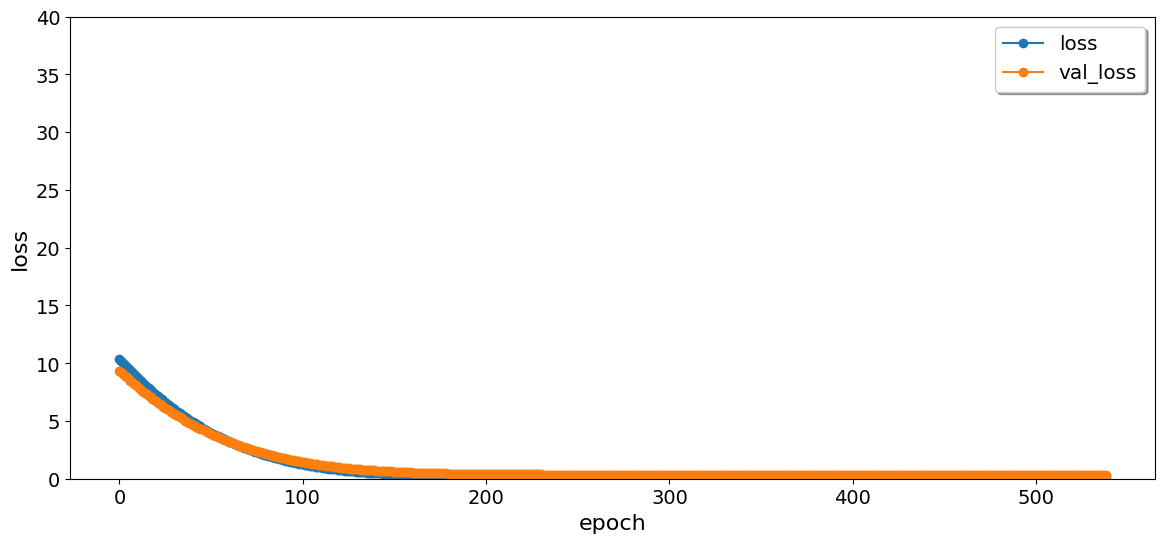

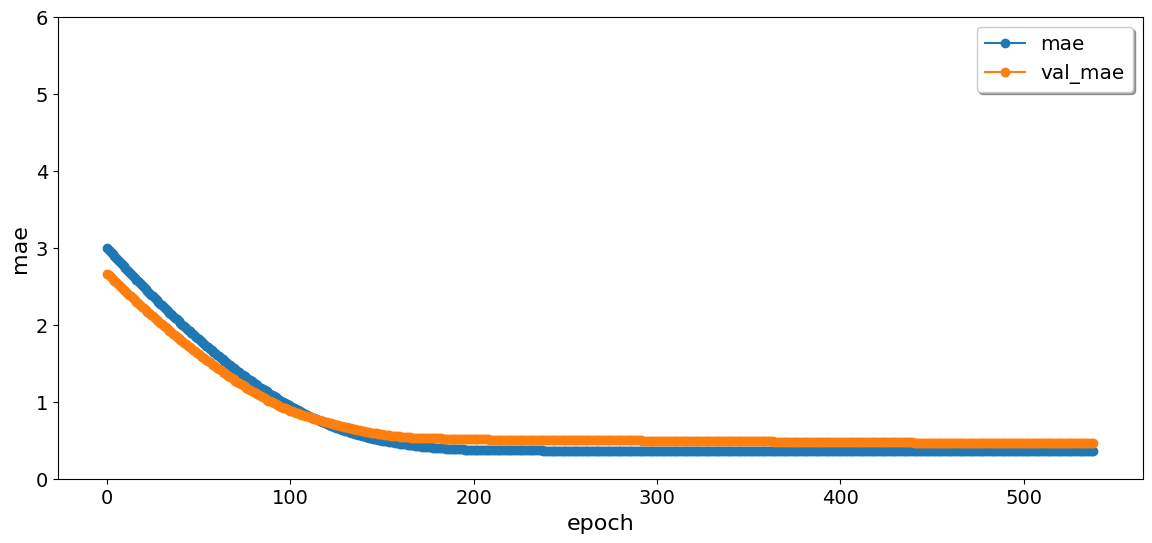

In [7]:
df=pd.DataFrame(data=ANNhistory.history)
figLOSS=df.plot(y=["loss","val_loss"],linestyle='-', marker='o',fontsize=14)
figLOSS.set_xlabel('epoch',fontdict={'fontsize':16})
figLOSS.set_ylabel('loss',fontdict={'fontsize':16})
figLOSS.set_ylim([0.0,40.0])
figLOSS.legend(loc='upper right', shadow=True, fontsize='x-large')

figMAE=df.plot(y=["mae","val_mae"],linestyle='-', marker='o',fontsize=14)
figMAE.set_xlabel('epoch',fontdict={'fontsize':16})
figMAE.set_ylabel('mae',fontdict={'fontsize':16})
figMAE.set_ylim([0.0,6.0])
figMAE.legend(loc='upper right', shadow=True, fontsize='x-large')

##### Prediction of the petal length of any iris as a function of its width

1/1 [==============================] - 0s 18ms/step


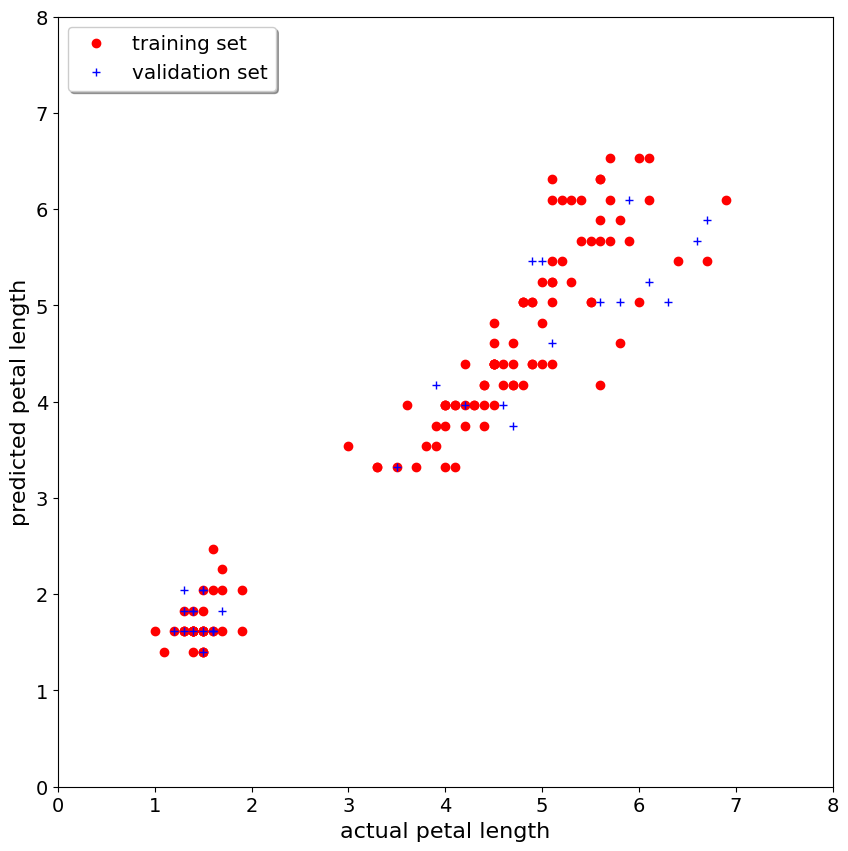

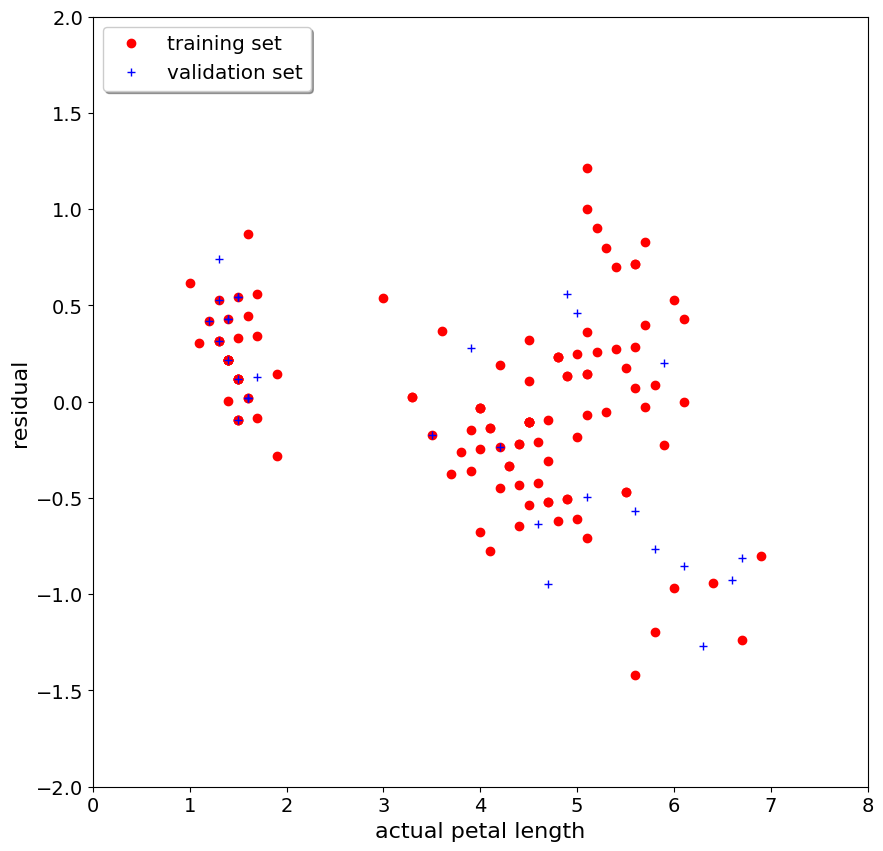

In [8]:
yhat_train=ANNmodel.predict(x_train)
yhat_test=ANNmodel.predict(x_test)
plt.rcParams["figure.figsize"] = (10,10)

maxL= 8.0
figP, axP = plt.subplots()
axP.plot(y_train,yhat_train,'ro',label='training set')
axP.plot(y_test,yhat_test,'b+',label='validation set')
axP.legend(loc='upper left', shadow=True, fontsize='x-large')
axP.set_xlim(0.0,maxL); axP.set_ylim(0.0,maxL)
axP.set_xlabel('actual petal length',fontsize=16)
axP.set_ylabel('predicted petal length',fontsize=16)
axP.tick_params(labelsize = 14)

diffyt = yhat_train - y_train
diffyp = yhat_test - y_test
figE, axE = plt.subplots()
axE.plot(y_train,diffyt,'ro',label='training set')
axE.plot(y_test,diffyp,'b+',label='validation set')
axE.legend(loc='upper left', shadow=True, fontsize='x-large')
axE.set_xlim(0.0,maxL); axE.set_ylim(-2,2)
axE.set_xlabel('actual petal length',fontsize=16)
axE.set_ylabel('residual',fontsize=16)
axE.tick_params(labelsize = 14)

 Train. mean:  0.003    std: 0.460    MAE: 0.354     R2: 0.961
  Test. mean: -0.060    std: 0.550    MAE: 0.458     R2: 0.974


,Error distribution,Type
0,0.430349,Test set
1,0.416854,Test set
2,0.743844,Test set
3,0.130349,Test set
4,0.543844,Test set
...,...,...
145,0.416854,Training set
146,-0.107707,Training set
147,0.116854,Training set
148,-0.034698,Training set


/home/romuald/Python3/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/romuald/Python3/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/romuald/Python3/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/romuald/Python3/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

[Text(0, 0.5, '')]

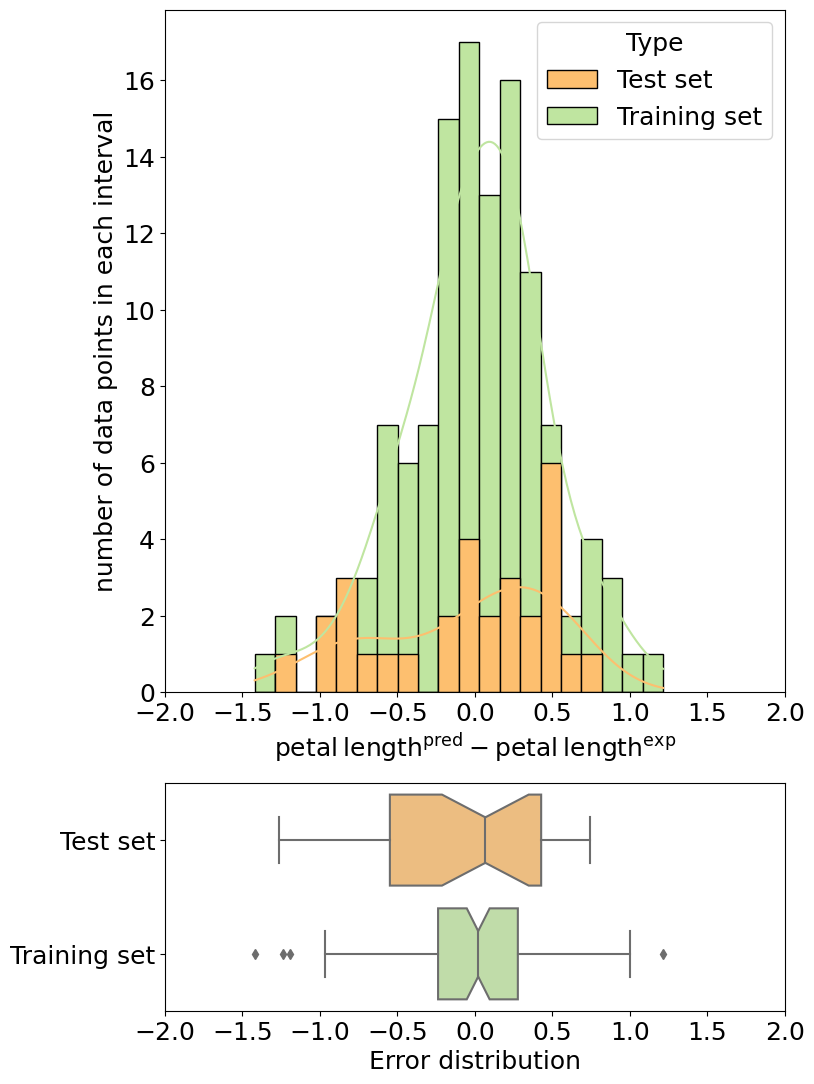

In [9]:
import seaborn as sns
from matplotlib import gridspec
# print(diffyt.values)
# print(diffyt.values.ravel())
print(f"{fg.GREEN}",
      f"Train. mean: {np.mean(diffyt.values.ravel()):6.3f}",
      f"   std: {np.std(diffyt.values.ravel()):.3f}",
      f"   MAE: {np.average(abs(diffyt.values.ravel())):.3f}",
      f"    R2: {np.corrcoef(y_train.values.ravel(),yhat_train.ravel())[0,1]:.3f}"
     )
print(f"{fg.BLUE}",
      f" Test. mean: {np.mean(diffyp.values.ravel()):6.3f}",
      f"   std: {np.std(diffyp.values.ravel()):.3f}",
      f"   MAE: {np.average(abs(diffyp.values.ravel())):.3f}",
      f"    R2: {np.corrcoef(y_test.values.ravel(),yhat_test.ravel())[0,1]:.3f}"
     )

# make a dataframe
df1 = pd.DataFrame(
    {
        "Error distribution": diffyp.values.ravel(),
        "Type": 'Test set'    },
)
df2 = pd.DataFrame(
    {
        "Error distribution": diffyt.values.ravel(),
        "Type": 'Training set'    },
)
distrib=pd.concat([df1,df2],ignore_index=True)
display(distrib)

xlim=2.0
nbins=20
plt.rcParams["figure.figsize"] = (8,13) #on ajuste la taille du graphique
plt.rcParams["font.size"] = (18) #on ajuste la taille des caractères
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
plt.subplot(gs[0])
fig1=sns.histplot(data=distrib,x="Error distribution", hue="Type", bins=nbins, kde=True, palette='Spectral', alpha=1.0)
plt.xlabel("$\mathrm{petal\:length}^{\mathrm{pred}}-\mathrm{petal\:length}^{\mathrm{exp}}$")
plt.ylabel("number of data points in each interval")
plt.xlim(-xlim,xlim)
plt.subplot(gs[1])
plt.xlim(-xlim,xlim)
fig2=sns.boxplot(data=distrib, x="Error distribution", y="Type", notch=True, orient = 'h',palette='Spectral')
fig2.set(ylabel=None)


### Comparison of the least-square fit linear and perceptron-based linear regressions

#### Parameters w and b of the trained perceptron model

In [10]:
print(f"{color.BOLD}{color.RED}Output Layer{color.OFF}")
print(f"w: {ANNmodel.layers[0].get_weights()[0]}")
print(f"b: {ANNmodel.layers[0].get_weights()[1]}")

Output Layer
w: [[2.1349535]]
b: [1.189863]


#### Linear regression with SciPy

In [11]:
from scipy.stats import linregress
pw=dfi["petal_width"].to_numpy()
pl=dfi["petal_length"].to_numpy()
fit = linregress(x=pw, y=pl)

a = fit.slope
b = fit.intercept
r = fit.rvalue
stderr = fit.stderr
istderr = fit.intercept_stderr

print(f"a   = {a:8.3f}\nb   = {b:8.3f}\nR^2 = {r**2:6.3f}")
print(f"Error on the slope ={stderr:8.3f}\nError on the y-intercept ={istderr:8.3f}")

a   =    2.226
b   =    1.091
R^2 =  0.927
Error on the slope =   0.051
Error on the y-intercept =   0.073


#### Graphical comparison

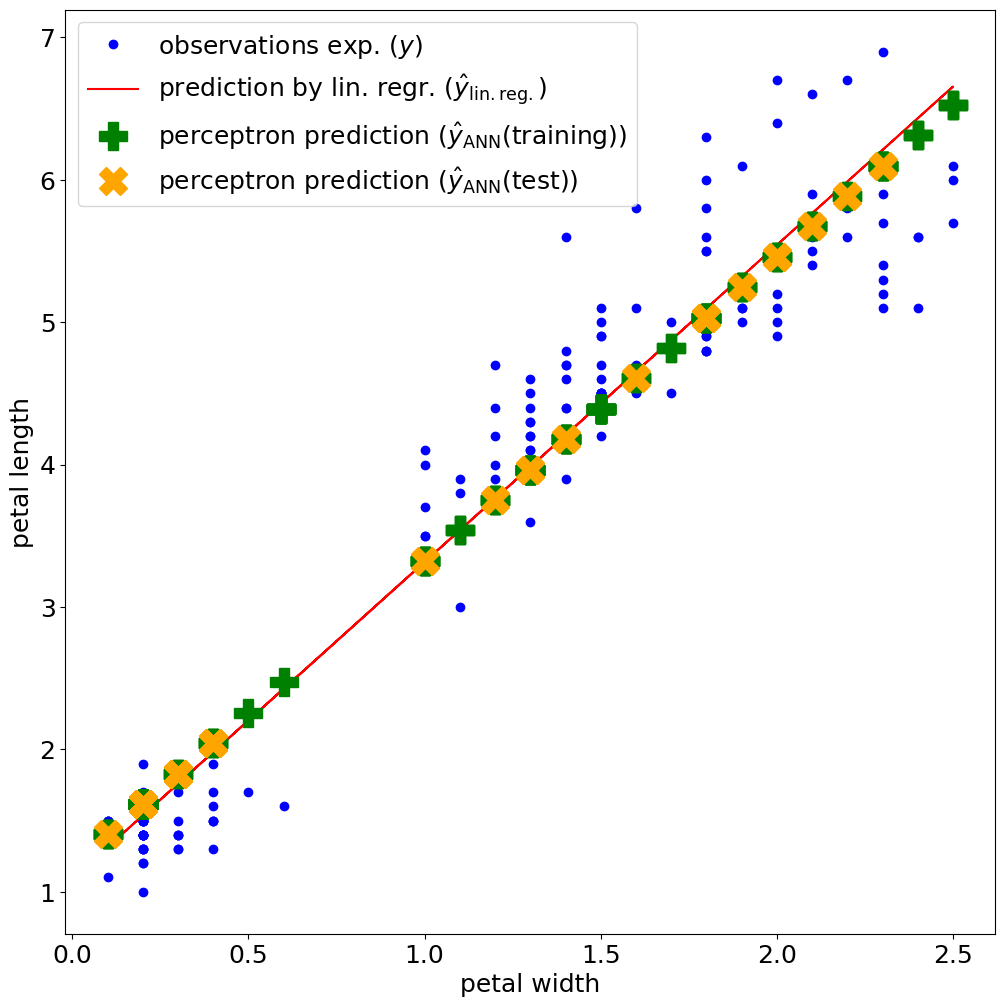

In [12]:
import matplotlib.pyplot as plt

def y_hat(a,b,x):
    return a * x + b
# on calcule pl_hat la longueur prédite, pour chacune des largeurs (pw) mesurées expérimentalement
pl_hat = y_hat(a,b,pw)

plt.rcParams["figure.figsize"] = (12,12) #on ajuste la taille du graphique
plt.plot(pw, pl,linestyle='', marker='o', color='blue', label='observations exp. ($y$)')
plt.plot(pw,pl_hat,color='red',label='prediction by lin. regr. ($\hat{y}_\mathrm{lin.reg.}$)')
plt.plot(x_train, yhat_train,linestyle='', marker='P', markersize=20, color='green', label='perceptron prediction ($\hat{y}_\mathrm{ANN}(\mathrm{training})$)')
plt.plot(x_test, yhat_test,linestyle='', marker='X', markersize=20, color='orange', label='perceptron prediction ($\hat{y}_\mathrm{ANN}(\mathrm{test})$)')
plt.xlabel("petal width") # label de l'axe des abscisses
plt.ylabel("petal length") # label de l'axe des ordonnées
plt.legend() #affichage de la légende sur le graphe

## Comments, conclusion and outlook

### The perceptron model with an activation function

<div class="intro">

<img src="./DS4B-Slides/perceptron8.jpg" alt="perceptron8" width="1200" style="display: block; margin: 0 auto; align:center"/>

</div>

### Beyond the perceptron model: deep learning

<div class="intro">

<img src="./DS4B-Slides/perceptron9.jpg" alt="perceptron9" width="1200" style="display: block; margin: 0 auto; align:center"/>

</div>

### Architectures of Artficial Neural Networks (ANN): *the neural network zoo*

<div class="intro">

[The neural network zoo, © Asimov Institute](https://www.asimovinstitute.org/neural-network-zoo/)

<img src="./DS4B-Slides/pngs/NeuralNetworkZoo20042019.png" alt="NNZoo" width="1200" style="display: block; margin: 0 auto; align:center"/>

</div>

### Is it possible to do machine learning with something else than ANNs?

<div class="intro">

[Yes! see for example "Top 10 Machine Learning Algorithms For Beginners: Supervised, and More"](https://www.simplilearn.com/10-algorithms-machine-learning-engineers-need-to-know-article)

<img src="./DS4B-Slides/perceptron10.jpg" alt="perceptron11" width="1200" style="display: block; margin: 0 auto; align:center"/>

</div>

### Prerequisite to do ML on your own

<div class="intro">

<img src="./DS4B-Slides/perceptron11.jpg" alt="perceptron11" width="1200" style="display: block; margin: 0 auto; align:center"/>
<br>
<br>
<img src="./DS4B-Slides/perceptron12.jpg" alt="perceptron12" width="1200" style="display: block; margin: 0 auto; align:center"/>

</div>

In [13]:
vID.end(cwd0)

**End at:** Saturday 30 September 2023, 18:46:18  
**Duration:** 00:00:51 420ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>